In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
class Line(object):
    def __init__(self, x):
        self.x = x

class needle(object):
    def __init__(self, l, x_start, y_start, angle):
        self.l = l
        self.x_start = x_start
        self.y_start = y_start
        self.x_end = x_start + l * math.cos(angle)
        self.y_end = y_start + l * math.sin(angle)
    
    def inter_line(self, L):
        self.score = (self.x_start <= L <= self.x_end) or (self.x_end <= L <= self.x_start)
        return self.score

xb, yb, xh, yh = 0, 0, 1, 1
lines = np.linspace(xb, xh, 20)
L = abs(lines[2] - lines[1])

In [7]:
needls = []
i = 1
N = 1000# Количество иголок
while i <= N: # генерация иголок
    el = needle(L, np.random.uniform(0, 1.001), np.random.uniform(0, 1.001), np.random.uniform(0, math.pi + 0.001))
    needls.append(el)
    i += 1

In [8]:
t = 0
PI = []
i = 0
for el in needls:
    i += 1
    for line in lines:
        if el.inter_line(line):
            t += 1
            break
    if t == 0:
        PI.append(0)
        continue
    PI.append(2 / (t / i))
print(f"Число Пи методом Монте-Карло {np.array(PI)[len(PI)//2:].mean()}")

Число Пи методом Монте-Карло 3.0746465989207916


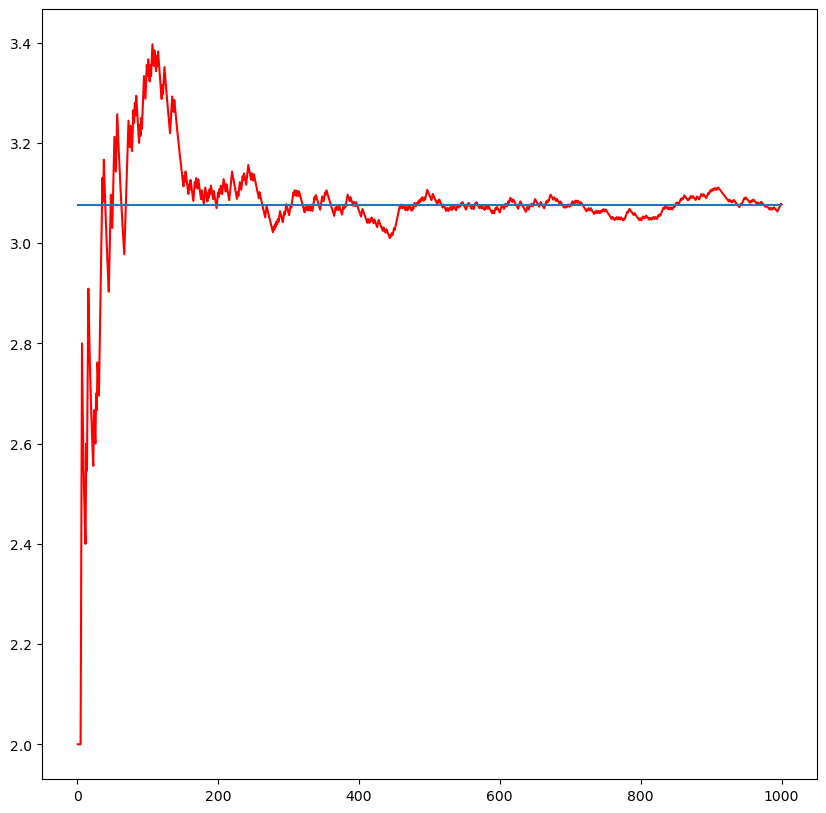

In [9]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(np.arange(1, N + 1), np.array(PI), color = 'r')
ax.hlines(2 / (t / N), 0, N);

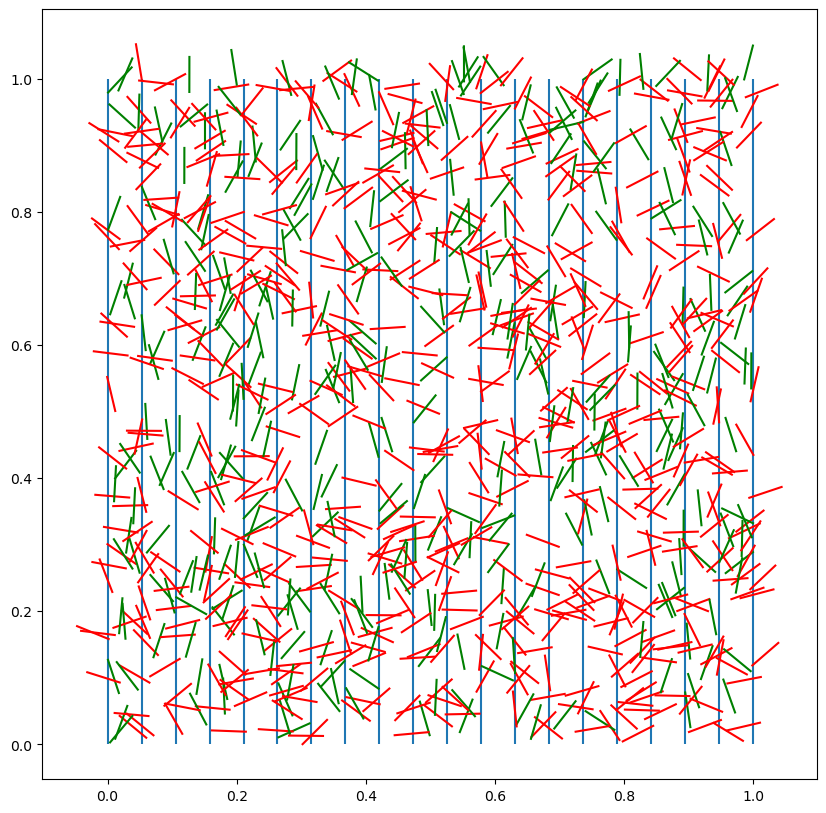

In [10]:
fig, ax = plt.subplots(figsize = (10, 10))
for l in lines:
    ax.vlines(l, 0, 1)
el = needls[0]
for el in needls:
    if el.score:
        ax.plot((el.x_start, el.x_end),(el.y_start, el.y_end), color = 'r')
    else:
        ax.plot((el.x_start, el.x_end),(el.y_start, el.y_end), color = 'g')